# Import data

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('Data/BankChurners.csv')

In [2]:
data = data.drop(data.columns[[21,22]], axis = 1)

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
data.shape

(10127, 21)

# EDA

In [5]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## Existing and attrited customers

The main characteristic of this dataset is that we have more information of existing customers than attrited customers


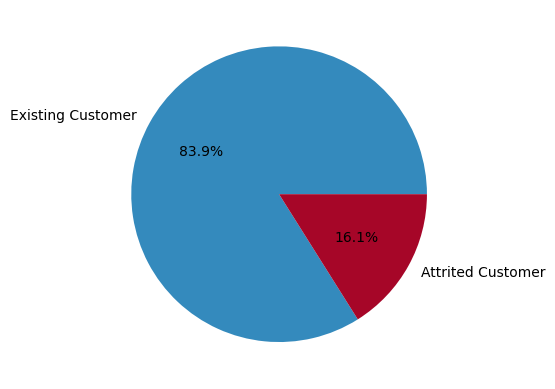

In [7]:
labels = data['Attrition_Flag'].unique()
plt.pie(data['Attrition_Flag'].value_counts(), labels = labels, autopct='%1.1f%%')
plt.show()

## Customer Age

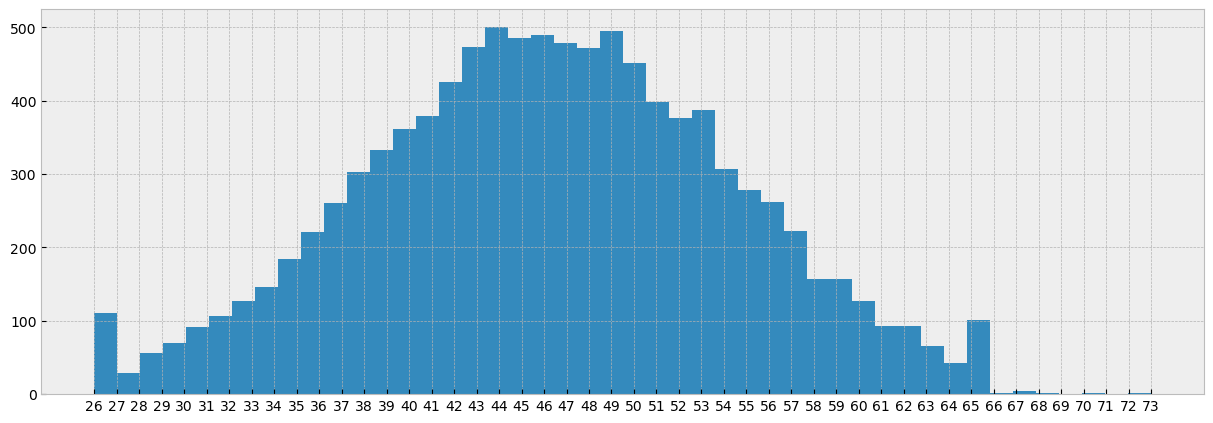

In [8]:
plt.figure(figsize=(15, 5))
plt.hist(data['Customer_Age'], bins = 46 , )
plt.xticks(np.arange(26,74,1))
plt.show()

<Figure size 1500x500 with 0 Axes>

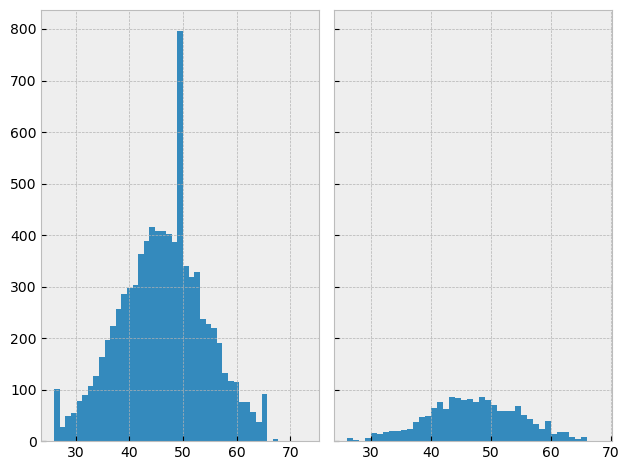

In [9]:
E_customer_age = data.loc[:,['Customer_Age']][data.Attrition_Flag == 'Existing Customer']
A_customer_age = data.loc[:,['Customer_Age']][data.Attrition_Flag != 'Existing Customer']

plt.figure(figsize=(15, 5))
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(E_customer_age, bins=len(E_customer_age.iloc[:,0].unique()))
axs[1].hist(A_customer_age, bins=len(A_customer_age.iloc[:,0].unique()))

plt.show()

## Gender

If we look upon the gender of the customers in the dataset, it is balanced.

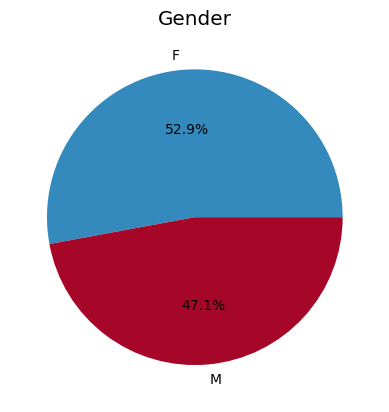

In [142]:
labels = 'F' , 'M'
plt.pie(data['Gender'].value_counts(), labels = labels, autopct='%1.1f%%')
plt.title('Gender')
plt.show()

In [13]:
E_customer_gender = data.loc[:,['Gender']][data.Attrition_Flag == 'Existing Customer']
A_customer_gender = data.loc[:,['Gender']][data.Attrition_Flag != 'Existing Customer']


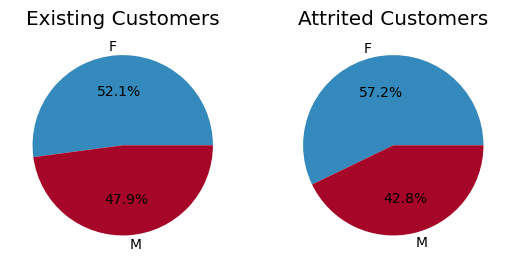

In [143]:
fig, ax = plt.subplots(1,2)
labels = 'F' , 'M'
ax[0].pie(E_customer_gender.iloc[:,0].value_counts(), labels=labels,autopct='%1.1f%%')
ax[1].pie(A_customer_gender.iloc[:,0].value_counts(), labels=labels,autopct='%1.1f%%')
ax[0].set_title('Existing Customers')
ax[1].set_title('Attrited Customers')

plt.show()

## Dependant count

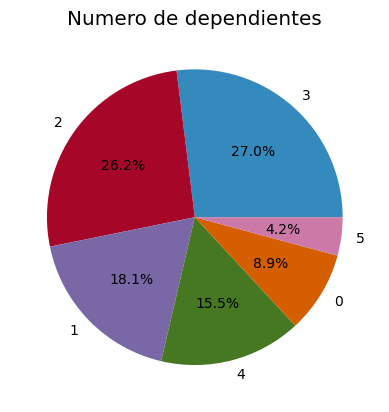

In [15]:
labels = data['Dependent_count'].value_counts().index
plt.pie(data['Dependent_count'].value_counts(), labels = labels, autopct='%1.1f%%')
plt.title('Numero de dependientes')
plt.show()

## Education level

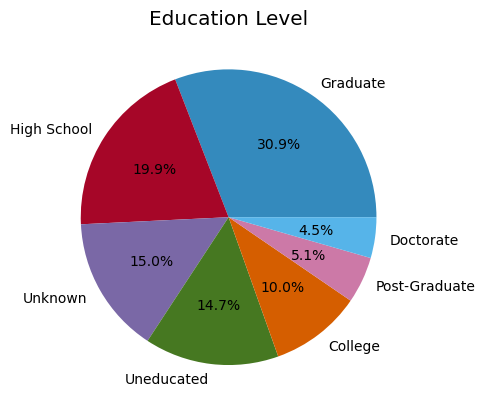

In [144]:
labels = data['Education_Level'].value_counts().index
plt.pie(data['Education_Level'].value_counts(), labels = labels, autopct='%1.1f%%')
plt.title('Education Level')
plt.show()

## Months on book


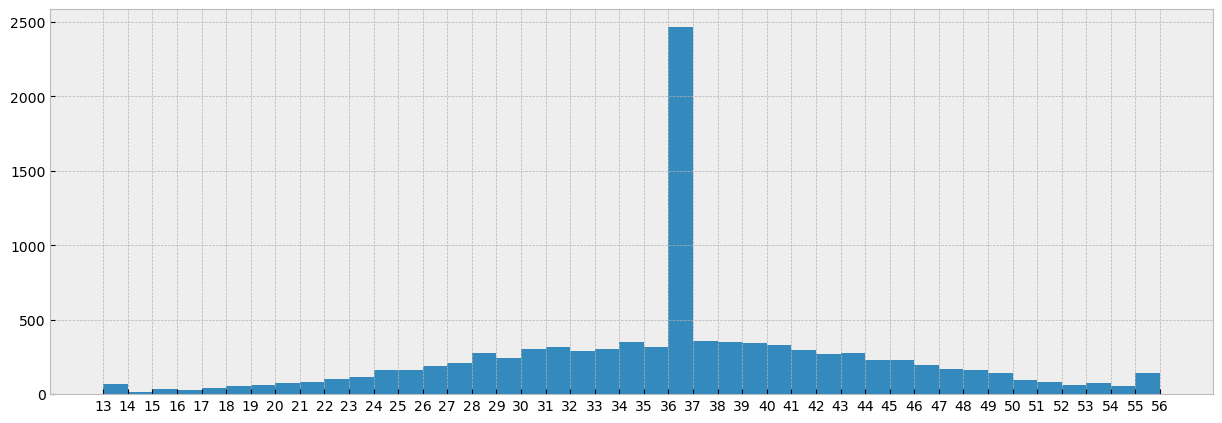

In [17]:
plt.figure(figsize=(15, 5))
plt.hist(data['Months_on_book'], bins = 43 , )
plt.xticks(np.arange(data['Months_on_book'].min(),data['Months_on_book'].max() +1 ,1))
plt.show()

## Total relationship count

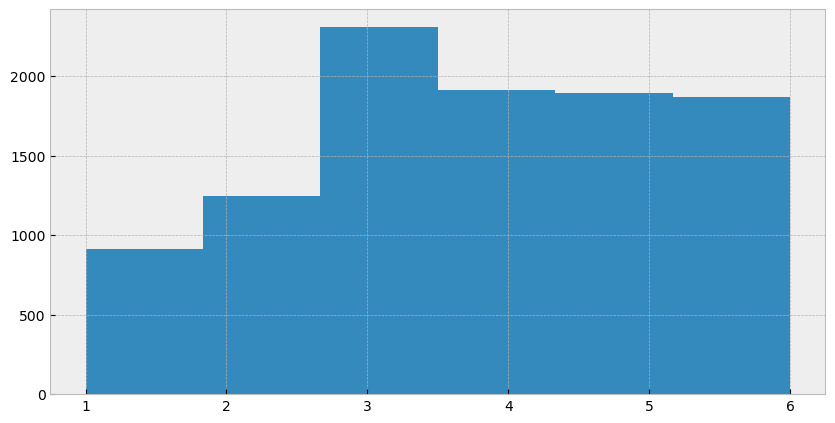

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(data['Total_Relationship_Count'], bins = 6 ,  )
plt.xticks(np.arange(data['Total_Relationship_Count'].min(),data['Total_Relationship_Count'].max() +1 ,1))
plt.show()

## Total_Revolving_Bal

In [20]:
data['Total_Revolving_Bal'].max()

2517

In [21]:
total_rev_cut = pd.cut(data['Total_Revolving_Bal'], 20).value_counts().sort_index()

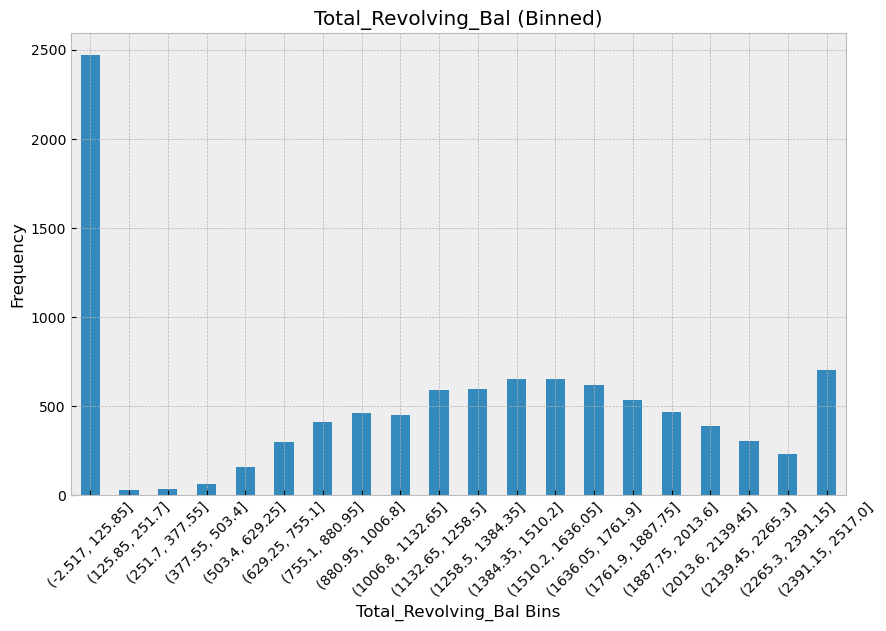

In [22]:
plt.figure(figsize=(10, 6))
total_rev_cut.plot(kind='bar')
plt.title('Total_Revolving_Bal (Binned)')
plt.xlabel('Total_Revolving_Bal Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

## Avg_open_to buy


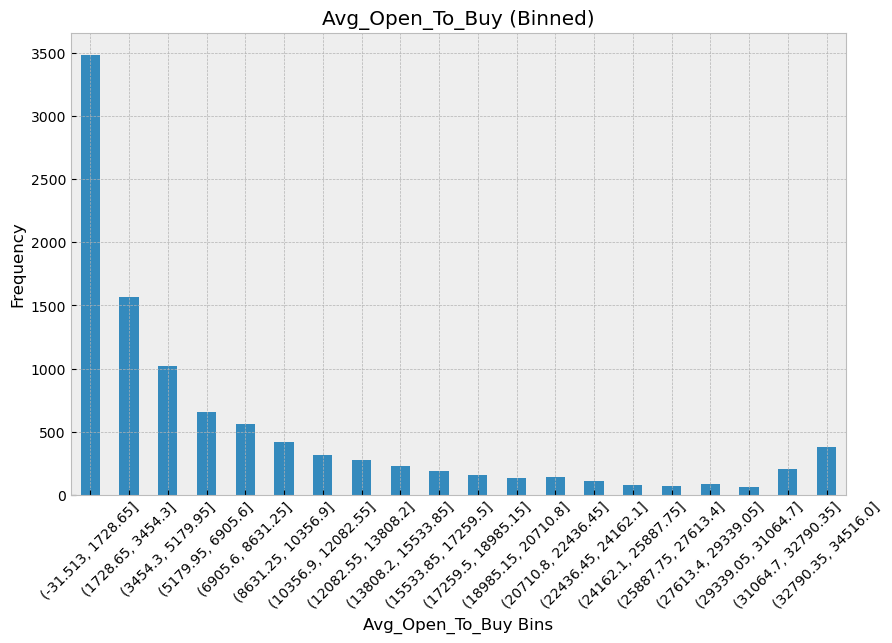

In [23]:
total_rev_cut = pd.cut(data['Avg_Open_To_Buy'], 20).value_counts().sort_index()
plt.figure(figsize=(10, 6))
total_rev_cut.plot(kind='bar')
plt.title('Avg_Open_To_Buy (Binned)')
plt.xlabel('Avg_Open_To_Buy Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

## Total transaction amount

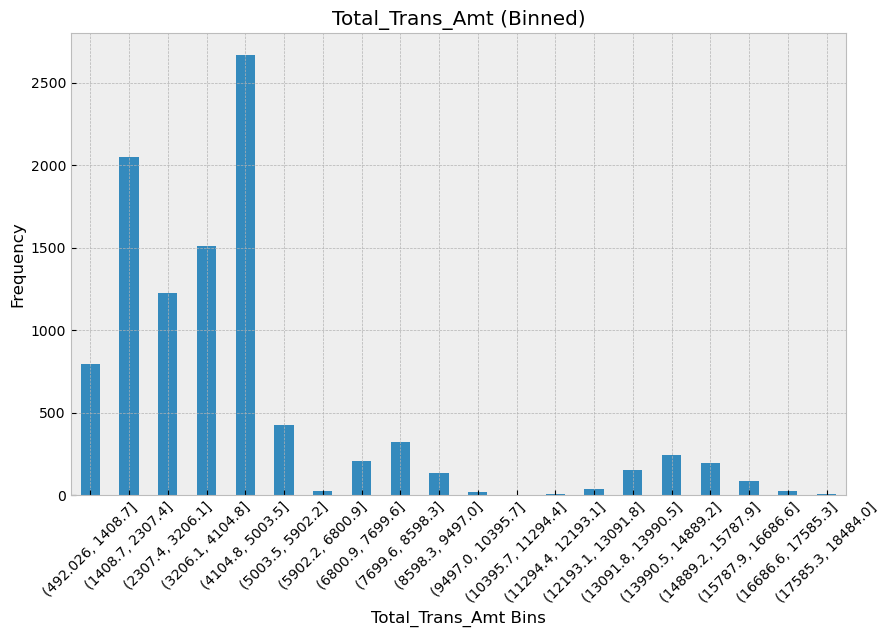

In [24]:
total_rev_cut = pd.cut(data['Total_Trans_Amt'], 20).value_counts().sort_index()
plt.figure(figsize=(10, 6))
total_rev_cut.plot(kind='bar')
plt.title('Total_Trans_Amt (Binned)')
plt.xlabel('Total_Trans_Amt Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

## Total transaction count

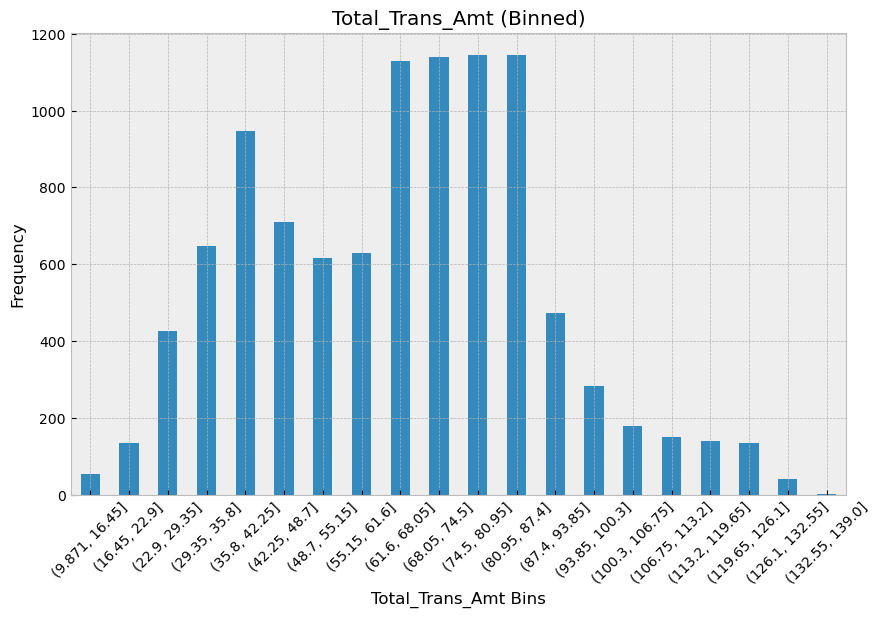

In [25]:
total_rev_cut = pd.cut(data['Total_Trans_Ct'], 20).value_counts().sort_index()
plt.figure(figsize=(10, 6))
total_rev_cut.plot(kind='bar')
plt.title('Total_Trans_Amt (Binned)')
plt.xlabel('Total_Trans_Amt Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

## Columns unique values
Knowing the number of unique values of a column we can identifie categorical attributes and if we can encode them.

In [149]:
columns_unique = []
for i in data.columns:
  columns_unique.append(len(data[i].unique()))
columns_unique_pd = pd.DataFrame({'Column name' : data.columns,'Number of unique values' : columns_unique})
columns_unique_pd

,Column name,Number of unique values
0,CLIENTNUM,10127
1,Attrition_Flag,2
2,Customer_Age,45
3,Gender,2
4,Dependent_count,6
5,Education_Level,7
6,Marital_Status,4
7,Income_Category,6
8,Card_Category,4
9,Months_on_book,44


## Estandarización y normalización

The numerical attributes have different scale, so we need to see how different are the scales and identifie wich attributes need to be modify in order to be in a similar scale with the others.

For feature scaling we will be using two different aprouches:
* Standarization
* Log + Standarization

The follow dataframe with the max and min values for column can give us an idea of the scale of every feature.

To decide the aprouch we need to see the distribution of the attribute values to decide whether we use standarization or log + standarization, we use the second if we have a big max values or a non-gaussian distribution



In [29]:
columns_min = []
columns_max = []
columns_nonobj =['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
for i in columns_nonobj :
  columns_min.append(data[i].min())
  columns_max.append(data[i].max())
columns_min_max = pd.DataFrame({'Column name' : columns_nonobj,
                                'Column min' : columns_min,
                                'Column max' : columns_max})
columns_min_max

,Column name,Column min,Column max
0,CLIENTNUM,708082083.0,8.283431e+08
1,Customer_Age,26.0,7.300000e+01
2,Dependent_count,0.0,5.000000e+00
3,Months_on_book,13.0,5.600000e+01
4,Total_Relationship_Count,1.0,6.000000e+00
5,Months_Inactive_12_mon,0.0,6.000000e+00
6,Contacts_Count_12_mon,0.0,6.000000e+00
7,Credit_Limit,1438.3,3.451600e+04
8,Total_Revolving_Bal,0.0,2.517000e+03
9,Avg_Open_To_Buy,3.0,3.451600e+04


CLIENTNUM: Número de cliente \

Customer_Age: igual \
Total_Relationship_Count: se queda igual \
Months_Inactive_12_mon: se queda igual\
Contacts_Count_12_mon: se queda igual\
Months_on_book: se queda igual \
Total_Amt_Chng_Q4_Q1: se queda igual \
Total_Ct_Chng_Q4_Q1: se queda igual \
Avg_Utilization_Ratio: se queda igual
Dependent_count: se queda igual  \

Attrition_Flag: Encode \
Gender: Encode \
Income_Category:Encode\
Education_Level:Encode \
Marital_Status: Encode \
Card_Category: Encode \

Credit_Limit: log standardization \
Avg_Open_To_Buy: log standarization \
Total_Trans_Amt: log standarization\

Total_Revolving_Bal: standarization \
Total_Trans_Ct: standarization\


# Data pre process

In [ ]:
data_2 = data.drop(['CLIENTNUM'],axis = 1).copy() # Eliminate the column CLIENTNUM
data_2 =data_2[~data_2.isin(['Unknown']).any(axis=1)] #Eliminate Unknown values

## Ordinal encoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [ ]:
#Ordinale encode of the features 
## Attrition_Flag
Att_Flag_cat = ['Existing Customer', 'Attrited Customer']
data_2['Attrition_Flag'] =  OrdinalEncoder(categories=[Att_Flag_cat]).fit_transform(data_2.loc[:,'Attrition_Flag':'Attrition_Flag'])
## Gender
data_2['Gender'] = ordinal_encoder.fit_transform(data_2.loc[:,'Gender':'Gender'])
Gender_cat = ordinal_encoder.categories_
## Income
income_cat = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K','$120K +']
data_2['Income_Category'] = OrdinalEncoder(categories=[income_cat]).fit_transform(data_2.loc[:,'Income_Category':'Income_Category'])
## Education Level
edu_level_cat = ['Uneducated','High School','College', 'Graduate','Post-Graduate', 'Doctorate']
data_2['Education_Level'] = OrdinalEncoder(categories=[edu_level_cat]).fit_transform(data_2.loc[:,'Education_Level':'Education_Level'])
## Card categories
card_cat_cat = ['Blue', 'Gold', 'Silver', 'Platinum']
data_2['Card_Category'] = OrdinalEncoder(categories=[card_cat_cat]).fit_transform(data_2.loc[:,'Card_Category':'Card_Category'])
## Marital status
marital_st_cat = ['Single','Married','Divorced']
data_2['Marital_Status'] = OrdinalEncoder(categories=[marital_st_cat]).fit_transform(data_2.loc[:,'Marital_Status':'Marital_Status'])

## Feature Scaling

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_2.iloc[:,1:],
                                                    data_2['Attrition_Flag'],
                                                    test_size = 0.33,
                                                    random_state = 42)

In [36]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline


std_log_pipe = Pipeline([
    ('log', FunctionTransformer(np.log)),  
    ('scaler', StandardScaler())
])
std_pipe = Pipeline([
    ('scaler', StandardScaler())
])
X_train[['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']] = std_log_pipe.fit_transform(X_train[['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']])
X_test[['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']] = std_log_pipe.transform(X_test[['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']])
X_train[['Total_Revolving_Bal','Total_Trans_Ct']] = std_pipe.fit_transform(X_train[['Total_Revolving_Bal','Total_Trans_Ct']])
X_test[['Total_Revolving_Bal','Total_Trans_Ct']] = std_pipe.transform(X_test[['Total_Revolving_Bal','Total_Trans_Ct']])

# Model selection and evaluation

In [ ]:
In this part 

## Machine Learning models

In [37]:
from sklearn.linear_model import LogisticRegression, SGDClassifier,LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict , cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


In [38]:
LR = LogisticRegression(solver='liblinear', class_weight= 'balanced')
LR.fit(X_train,y_train)


LogisticRegression(class_weight='balanced', solver='liblinear')

In [39]:
SVC = SVC(class_weight = 'balanced')
SVC.fit(X_train,y_train)

SVC(class_weight='balanced')

In [40]:
SGD = SGDClassifier(class_weight= 'balanced')
SGD.fit(X_train,y_train)

SGDClassifier(class_weight='balanced')

In [41]:
f1_score_LR = cross_val_score(LR, X_train, y_train, cv=5, scoring="f1")
f1_score_SVC = cross_val_score(SVC, X_train, y_train, cv=5, scoring="f1")
f1_score_SGD = cross_val_score(SGD, X_train, y_train, cv=5, scoring="f1")


In [42]:
f1_score_SVC

array([0.5952381 , 0.55050505, 0.5462754 , 0.54814815, 0.54590571])

In [43]:
f1_score_LR

array([0.65174129, 0.65454545, 0.6300716 , 0.61809045, 0.64248705])

In [44]:
f1_score_SGD

array([0.5870021 , 0.40607735, 0.68852459, 0.63428571, 0.44859813])

## Confusion Matrix

In [45]:
y_train_pred_LR = cross_val_predict(LR, X_train, y_train, cv=3)
y_train_pred_SVC = cross_val_predict(SVC, X_train, y_train, cv=3)
y_train_pred_SGD = cross_val_predict(SGD, X_train, y_train, cv=3)

In [46]:
CM_LR = confusion_matrix(y_train, y_train_pred_LR)
CM_SVC = confusion_matrix(y_train, y_train_pred_SVC)
CM_SGD = confusion_matrix(y_train, y_train_pred_SGD)


In [47]:
CM_LR

array([[3379,  616],
       [ 109,  640]])

In [48]:
CM_SGD

array([[2811, 1184],
       [  83,  666]])

In [49]:
CM_SVC

array([[3264,  731],
       [ 174,  575]])

In [50]:
y_train.value_counts()

Attrition_Flag
0.0    3995
1.0     749
Name: count, dtype: int64

## Focal Loss

In [67]:
import torch
import torch.nn as nn
import torchvision

X_train_t = torch.from_numpy(X_train.values).type(torch.float)
y_train_t = torch.from_numpy(y_train.values).type(torch.float)
X_test_t = torch.from_numpy(X_test.values).type(torch.float)
y_test_t = torch.from_numpy(y_test.values).type(torch.float)

In [68]:

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha 
        self.gamma = gamma  
        self.reduction = reduction

    def forward(self, inputs, targets):
        
        BCE_loss = nn.functional.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        
        # Compute pt (model confidence on true class)
        pt = torch.exp(-BCE_loss)
        
        # Apply the focal adjustment
        focal_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss

        # Apply reduction (mean, sum, or no reduction)
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

### Regresión Logistica

In [69]:
class LogisticRegression_torch(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=19, out_features= 1)
    
    def forward(self,x):
        return self.linear(x)

LR_torch = LogisticRegression_torch()
        

In [70]:
loss_fn = FocalLoss(alpha = 0.25, gamma = 2.8)

optimizer = torch.optim.AdamW(LR_torch.parameters(), lr=1e-4, weight_decay=5e-2)



#### training


In [71]:

# Loop de entrenamiento
torch.manual_seed(42)

epochs = 5000

for epoch in range(epochs):
    ### Modo entrenamiento
    LR_torch.train()
    # Forward pass
    y_logits = LR_torch(X_train_t).squeeze()
    #Calcular Loss
    loss = loss_fn(y_logits, y_train_t)
    
    #Loss backward
    loss.backward()
    
    #Optimizer step
    optimizer.step()

    #Optimizer
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0 :
        print(f"epoch : {epoch + 1} | loss : {loss.item() : 4f}")

    
    
    


epoch : 10 | loss :  0.291666
epoch : 20 | loss :  0.287520
epoch : 30 | loss :  0.283368
epoch : 40 | loss :  0.279209
epoch : 50 | loss :  0.275041
epoch : 60 | loss :  0.270864
epoch : 70 | loss :  0.266677
epoch : 80 | loss :  0.262480
epoch : 90 | loss :  0.258271
epoch : 100 | loss :  0.254050
epoch : 110 | loss :  0.249816
epoch : 120 | loss :  0.245568
epoch : 130 | loss :  0.241306
epoch : 140 | loss :  0.237028
epoch : 150 | loss :  0.232734
epoch : 160 | loss :  0.228422
epoch : 170 | loss :  0.224092
epoch : 180 | loss :  0.219743
epoch : 190 | loss :  0.215374
epoch : 200 | loss :  0.210983
epoch : 210 | loss :  0.206571
epoch : 220 | loss :  0.202136
epoch : 230 | loss :  0.197678
epoch : 240 | loss :  0.193195
epoch : 250 | loss :  0.188688
epoch : 260 | loss :  0.184156
epoch : 270 | loss :  0.179599
epoch : 280 | loss :  0.175018
epoch : 290 | loss :  0.170411
epoch : 300 | loss :  0.165781
epoch : 310 | loss :  0.161129
epoch : 320 | loss :  0.156456
epoch : 330 | los

#### Test

In [72]:
LR_torch.eval()
with torch.inference_mode():
    y_logits = LR_torch(X_test_t)
    y_preds = torch.sigmoid(y_logits).round()

In [73]:
f1_score(y_test_t,y_preds)

0.4774193548387097

In [74]:
y_test.value_counts()

Attrition_Flag
0.0    1973
1.0     364
Name: count, dtype: int64

In [75]:
confusion_matrix(y_test,y_preds)

array([[1865,  108],
       [ 216,  148]])

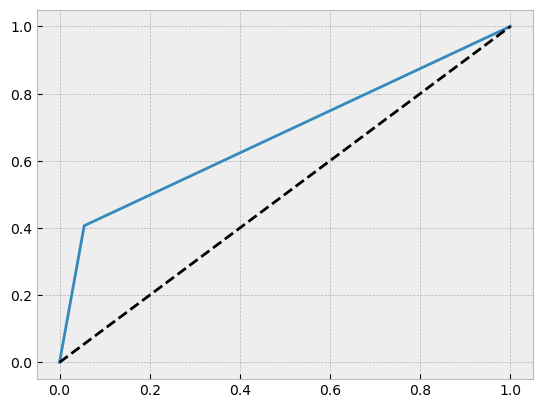

In [76]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

In [77]:
from sklearn.metrics import roc_auc_score , recall_score, precision_score
roc_auc_score(y_test,y_preds)

0.675927215207499

In [78]:
recall_score(y_test,y_preds)

0.4065934065934066

In [79]:
precision_score(y_test,y_preds)

0.578125

In [80]:
f1_score(y_test_t,y_preds)

0.4774193548387097

In [81]:
LR_torch.eval()
with torch.inference_mode():
    y_logits_train = LR_torch(X_train_t)
    y_preds_train = torch.sigmoid(y_logits_train).round()

In [82]:
f1_score(y_train_t,y_preds_train)

0.4359626802374894

In [83]:
from sklearn.metrics import precision_recall_curve

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_train, y_logits_train)


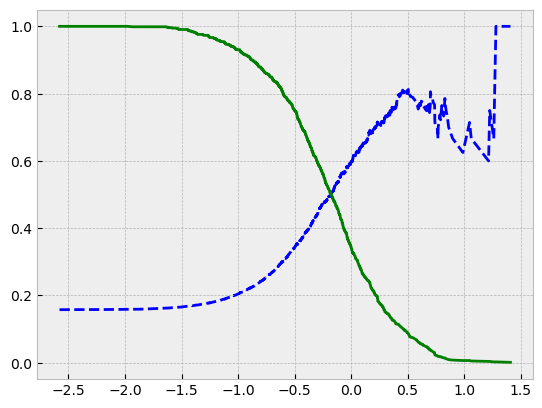

In [84]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold, add the legend, axis label and grid
plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.show()

In [85]:
custom_threshold = 0.3  # Example (replace with your optimal threshold)
y_pred_custom = (y_logits_train >= custom_threshold).type(torch.uint8) 
y_pred_custom_test = (y_logits >= custom_threshold).type(torch.uint8) 

In [86]:
y_pred_custom

tensor([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=torch.uint8)

In [87]:
confusion_matrix(y_train,y_pred_custom)

array([[3954,   41],
       [ 636,  113]])

In [88]:
confusion_matrix(y_test,y_pred_custom_test)

array([[1942,   31],
       [ 293,   71]])

In [89]:
f1_score(y_train,y_pred_custom)

0.2502768549280177

In [90]:
precision_score(y_train,y_pred_custom) , recall_score(y_train,y_pred_custom)

(0.7337662337662337, 0.15086782376502003)

### Neural Network

In [113]:
# Build a moel with non linear activation
from torch import nn
class ModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 19, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()
  def forward(self,x):
    # Where should we put our non linear actv function?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
nnModel = ModelV2()
nnModel

ModelV2(
  (layer_1): Linear(in_features=19, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [128]:
loss_fn = FocalLoss(alpha = 0.25, gamma = 2.8)

optimizer = torch.optim.AdamW(nnModel.parameters(), lr=1e-3, weight_decay=5e-2)

In [134]:

# Loop de entrenamiento
torch.manual_seed(42)

epochs = 5000

for epoch in range(epochs):
    ### Modo entrenamiento
    nnModel.train()
    # Forward pass
    y_logits = nnModel(X_train_t).squeeze()
    #Calcular Loss
    loss = loss_fn(y_logits, y_train_t)
    
    #Loss backward
    loss.backward()
    
    #Optimizer step
    optimizer.step()

    #Optimizer
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0 :
        print(f"epoch : {epoch + 1} | loss : {loss.item() : 4f}")

epoch : 10 | loss :  0.002878
epoch : 20 | loss :  0.002877
epoch : 30 | loss :  0.002877
epoch : 40 | loss :  0.002872
epoch : 50 | loss :  0.002870
epoch : 60 | loss :  0.002872
epoch : 70 | loss :  0.002867
epoch : 80 | loss :  0.002866
epoch : 90 | loss :  0.002864
epoch : 100 | loss :  0.002863
epoch : 110 | loss :  0.002861
epoch : 120 | loss :  0.002859
epoch : 130 | loss :  0.002862
epoch : 140 | loss :  0.002855
epoch : 150 | loss :  0.002848
epoch : 160 | loss :  0.002842
epoch : 170 | loss :  0.002837
epoch : 180 | loss :  0.002836
epoch : 190 | loss :  0.002829
epoch : 200 | loss :  0.002825
epoch : 210 | loss :  0.002818
epoch : 220 | loss :  0.002817
epoch : 230 | loss :  0.002819
epoch : 240 | loss :  0.002810
epoch : 250 | loss :  0.002810
epoch : 260 | loss :  0.002804
epoch : 270 | loss :  0.002806
epoch : 280 | loss :  0.002802
epoch : 290 | loss :  0.002804
epoch : 300 | loss :  0.002796
epoch : 310 | loss :  0.002790
epoch : 320 | loss :  0.002789
epoch : 330 | los

#### Test

In [136]:
nnModel.eval()
with torch.inference_mode():
    y_logits_nn =nnModel(X_test_t)
    y_preds_nn = torch.sigmoid(y_logits_nn).round()

In [137]:
confusion_matrix(y_test,y_preds_nn)

array([[1923,   50],
       [  63,  301]])

In [138]:
f1_score(y_test, y_preds_nn)

0.8419580419580419

In [140]:
recall_score(y_test, y_preds_nn)

0.8269230769230769

In [139]:
precision_score(y_test, y_preds_nn)

0.8575498575498576

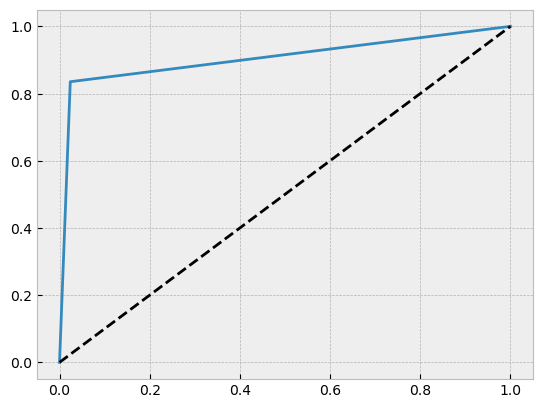

In [133]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds_nn)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()